## 6.01 - Supervised Learning Model Comparison

Recall the "data science process."

1. Define the problem.
2. Gather the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting income, you should pretend as though you do not have access to the 'e401k` (eligible for 401k), the `p401k` (participating in 401k) variable, and the `pira` (if someone has an IRA) variable. When predicting `e401k`, you probably wouldn't want to use 'p401k' or 'e401k'

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
df = pd.read_csv("./401ksubs.csv")

In [76]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [77]:
df.shape

(9275, 11)

##### 2. What are 2-3 other variables that, if available, would be helpful to have?

**Answer:** _(Answers may vary.)_

- It would be helpful to have variables that predict financial stability,  
    a) how much money is in savings account, 
    b) how much money is in checking account
    c) credit score.
- Owning a house versus renting a residence may be a good indicator of someone able and willing to save money. (The same goes for a car, too!)
- Knowing whether or not the person has made investments into stocks, bonds, or Certificates of Deposits (CDs) would be helpful to predict eligibility for 401(k)s.

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

**Answer:** _(Answers may vary.)_

Putting race into a model is often an unethical thing to do. In this particular scenario, using race to predict whether or not someone is eligible for a 401k is using race to target who should qualify for a particular product or service. It is unacceptable to discriminate on the basis of race here, even if race by itself wouldn't immediately disqualify somebody from being targeted.

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

**Answer:** Trivially, we wouldn't use income to predict income - because we wouldn't need to predict if we always possessed the data we wanted to predict! Similarly, if we had access to `incsq`, then we wouldn't need to predict `inc`. I would not use either of those feataures.

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

**Answer:** `incsq` and `agesq` appear to already have been feature engineered. Assuming that this was done by subject-matter experts, it's likely that they found there's some quadratic (squared) relationship between income and eligibility for a 401k. (The same goes for age and eligibility for a 401k.) Perhaps people who are older or have higher incomes are exponentially more likely to be eligible for an IRA, so these terms account for that nonlinearity.

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

**Answer:** There appear to be two errors! `inc` is defined as `inc^2` and `age` is defined as `age^2`. While these are correct for `incsq` and `agesq`, `inc` should refer to one's income (not sure if it's household or individual) and `age` should refer to one's age.

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

**Answer:**
    
    - a multiple linear regression model (Yes, we can understand influence of features.)
    - a $k$-nearest neighbors model (No, we cannot understand influence of features.)
    - a decision tree (Yes, we can understand influence of features.)
    - a set of bagged decision trees (Yes, we can understand influence of features.)
    - a random forest (Yes, we can understand influence of features.)
    - a set of extremely randomized trees (Yes, we can understand influence of features.)
    - an Adaboost model (Yes, we can understand influence of features.)

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a $k$-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor


from sklearn.model_selection import train_test_split

- In the case where I'm predicting `inc`, I'm excluding `e401k`, `p401k`, `pira`, `inc`, and `incsq` as predictors.
- Given the small number of predictors (6) and the large sample size (9275), I'm comfortable training my model on 80% of my data. Testing on the remaining 20% still leaves nearly 2,000 observations to test on, which should be sufficient!
- **Important**: Because at least one of my models is distance-based ($k$-nn) and in case we want to regularize any models, we should scale our features. (If we don't scale our features, then $k$-nn will likely perform poorly because nearest neighbors will be driven by distance of variables to the target.

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaled_df  = pd.DataFrame(StandardScaler().fit_transform(df),
                        columns = df.columns)

In [81]:
y = scaled_df['inc']
X = scaled_df.drop(columns = ['e401k', 'p401k', 'pira', 'inc', 'incsq'])

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = .2,
                                                    random_state = 42)

In the interest of time, I'm going to use the defauls on all seven models. However, if we wanted to do so, we could GridSearch over parameters of each model.

In [83]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
print('Linear Regression R2 score', lr_reg.score(X_test, y_test))

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
print('DT R2 score', dt_reg.score(X_test, y_test))

bagged_reg = BaggingRegressor()
bagged_reg.fit(X_train, y_train)
print('Bagging R2 score', bagged_reg.score(X_test, y_test))

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
print('RFReg R2 score', rf_reg.score(X_test, y_test))

ada_reg = AdaBoostRegressor()
ada_reg.fit(X_train, y_train)
print('Ada R2 score', ada_reg.score(X_test, y_test))

Linear Regression R2 score 0.27494825152
DT R2 score -0.189800016359
Bagging R2 score 0.258960710529
RFReg R2 score 0.24420553451
Ada R2 score -0.145653628247


##### 9. What is bootstrapping?

**Answer:** Bootstrapping is a method of sampling with replacement. We usually use it in order to simulate many different samples or to empirically estimate the sampling distribution of a statistic.

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

**Answer:** With a set of bagged decision trees, we have bootstrapped $k$ different samples and grown one decision tree on each bootstrapped sample, then our predictions are aggregated. With one decision tree, we only use the original sample and grow exactly one decision tree. No aggregation of predictions occurs!

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

**Answer:** In bagged decision trees, every variable is considered as a "candidate" for splitting at each node in the decision tree. In random forests, a random subset of variables is considered as candidataes for splitting at each node.

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

**Answer:** In a random forest, features are randomly selected togo into each split. This effectively makes our individual decision trees less correlated, which decreases the variance of our predictions after aggregating the different decision trees. Thus, a random forest usually has less variance than bagged decision trees.

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

In [84]:
from sklearn.metrics import mean_squared_error

In [85]:
def rmse_score(model, X_train, X_test, y_train, y_test):
    mse_train = mean_squared_error(y_true = y_train,
                                  y_pred = model.predict(X_train))
    mse_test = mean_squared_error(y_true = y_test,
                                  y_pred = model.predict(X_test))
    rmse_train = mse_train ** 0.5
    rmse_test = mse_test ** 0.5
    
    print("The training RMSE for " + str(model) + " is: " + str(rmse_train))
    print("The testing RMSE for " + str(model) + " is: " + str(rmse_test))
    return (rmse_train, rmse_test)

In [86]:
rmse_score(lr_reg, X_train, X_test, y_train, y_test)

The training RMSE for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is: 0.837083033245
The testing RMSE for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) is: 0.867519360589


(0.83708303324534916, 0.86751936058931678)

In [87]:
rmse_score(dt_reg, X_train, X_test, y_train, y_test)

The training RMSE for DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') is: 0.093978200924
The testing RMSE for DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') is: 1.11130088188


(0.093978200923999861, 1.1113008818764796)

In [88]:
rmse_score(bagged_reg, X_train, X_test, y_train, y_test)

The training RMSE for BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False) is: 0.36468718174
The testing RMSE for BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False) is: 0.877031699897


(0.36468718174043463, 0.87703169989651475)

In [89]:
rmse_score(rf_reg, X_train, X_test, y_train, y_test)

The training RMSE for RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) is: 0.364357053602
The testing RMSE for RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) is: 0.885720155009


(0.36435705360231307, 0.88572015500914147)

In [90]:
rmse_score(ada_reg, X_train, X_test, y_train, y_test)

The training RMSE for AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) is: 1.05449367893
The testing RMSE for AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None) is: 1.09048913059


(1.0544936789256536, 1.0904891305940216)

Putting the training and testing RMSE in a table so we can directly compare them all:

|           Model          | Training RMSE | Testing RMSE |
|:------------------------:|:-------------:|:------------:|
|     Linear Regression    |     0.837     |     0.867    |
|       Decision Tree      |     0.094     |     1.121    |
|   Bagged Decision Trees  |     0.366     |     0.877    |
|       Random Forest      |     0.374     |     0.877    |
|         AdaBoost         |     0.927     |     0.976   |

##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

**Answer:** It appears that every model is overfit to the training data. We recognize this because our testing RMSE is worse (higher) than our training RMSE. Our models are generalizing poorly to held-out/unseen data.

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

**Answer:** _(Answers may vary.)_

When I have a series of models from which I can pick, I usually do the following:
1. List out all of the models.
2. Any model that cannot solve my problem, I remove.
    - In this case, $k$-nn is not appropriate because I can't easily identify which features affect income. (Remember that my original problem is "What features best predict one's income?") Even if it's a very predictive model, my goal isn't to come up with the best predictions.
3. Among the models that _can_ solve my problems, I want to find the one that performs the best based on a metric of my choice.
    - In this case, the models that seem to overfit the least (i.e. the gap between training and testing RMSE) are linear regression, AdaBoost, and the Support Vector Regressor.
4. At this stage, it becomes a judgment call with no perfect guide to make the final decision.
    - Do you have time to tune the models to try and eke out better performance?
    - Is one model substantially better at solving the problem you wanted to solve?
    - Do you need something understandable by a lay audience? (i.e. Linear regression is more common and more easily understood than AdaBoost or Support Vector Machines.)
    
Personally (if given time), I would try tuning the three remaining models to see if one performs substantially better than the other. If they all have roughly the same performance, I generally go with the simplest/easiest to understand model. In this case, I will go with the linear regression model.

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

**Answer:** _(Answers may vary.)_

1. As mentioned above, I would tune my models using GridSearch.
    - Using model defaults, then picking one model, and only tuning that is an example of a greedy approach. Instead, if we were to GridSearch all seven models, we might arrive at a model that is better than only having tuned the one model whose default was better than all other defaults.
2. Get more data
3. I would consider transforming my $Y$ variable. Income is often skewed, which means there will usually be a handful of very high incomes that might skew any linear model. I would consider transforming income (likely using $\log$) so that income is "un-skewed".

In [91]:
import numpy as np

(array([ 3826.,  2890.,  1443.,   611.,   315.,   108.,    41.,    27.,
           10.,     4.]),
 array([  10.008 ,   28.9113,   47.8146,   66.7179,   85.6212,  104.5245,
         123.4278,  142.3311,  161.2344,  180.1377,  199.041 ]),
 <a list of 10 Patch objects>)

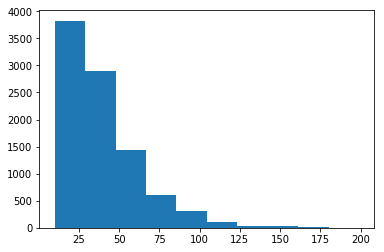

In [92]:
plt.hist(df['inc'])  #definitely skewed

In [93]:
y_log = np.log(df['inc'])

(array([  599.,   983.,  1322.,  1705.,  1733.,  1480.,   874.,   432.,
          118.,    29.]),
 array([ 2.30338477,  2.60239738,  2.90140999,  3.20042259,  3.4994352 ,
         3.7984478 ,  4.09746041,  4.39647302,  4.69548562,  4.99449823,
         5.29351083]),
 <a list of 10 Patch objects>)

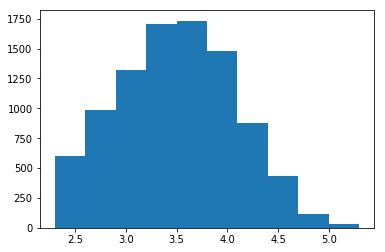

In [94]:
plt.hist(y_log)

In [97]:
# Feature Importances!

fi = pd.DataFrame({
        'feature':X.columns,
        'importance':ada_reg.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)
fi

,feature,importance
4,nettfa,0.693637
0,marr,0.115282
2,age,0.075041
5,agesq,0.072711
3,fsize,0.024421
1,male,0.018908


## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

**Answer:** Because it doesn't make sense to include people who already have a 401k - they clearly are eligble for one so this variable on it's own doesn't really help us much - too highly correlated with the target variable

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

**Answer:**

    - a logistic regression model (Yes, we can predict whether or not one is eligible for a 401(k).)
    - a $k$-nearest neighbors model (Yes, we can predict whether or not one is eligible for a 401(k).)
    - a Naive Bayes model (Yes, we can predict whether or not one is eligible for a 401(k).)
    - a decision tree (Yes, we can predict whether or not one is eligible for a 401(k).)
    - a set of bagged decision trees (Yes, we can predict whether or not one is eligible for a 401(k).)
    - a random forest (Yes, we can predict whether or not one is eligible for a 401(k).)
    - a set of extremely randomized trees (Yes, we can predict whether or not one is eligible for a 401(k).)
    - an Adaboost model (Yes, we can predict whether or not one is eligible for a 401(k).)
    - an XGBoost model (Yes, we can predict whether or not one is eligible for a 401(k).)
    - a support vector classifier (Yes, we can predict whether or not one is eligible for a 401(k).)

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a $k$-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector classifier
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier



In [64]:
scaled_df['e401k'].value_counts()  
#need to binarize this because once it was scaled it was not in binary form anymore
 ## I needed to turn my Y vector into a discrete variable.

-0.803173    5638
 1.245062    3637
Name: e401k, dtype: int64

In [65]:
scaled_df['e401k'] = [1 if scaled_df['e401k'][i] > 0 else 0 for i in range(scaled_df.shape[0])]
scaled_df['e401k'].value_counts()

0    5638
1    3637
Name: e401k, dtype: int64

In [66]:
X = scaled_df.drop(columns = ['e401k', 'p401k'])
y = scaled_df['e401k']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = .2,
                                                    random_state = 42)

In [68]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('logreg accuracy', logreg.score(X_test, y_test))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('knn accuracy', knn.score(X_test, y_test))


dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('dtc accuracy', dtc.score(X_test, y_test))

bagged_class = BaggingClassifier()
bagged_class.fit(X_train, y_train)
print('bagged_class accuracy', bagged_class.score(X_test, y_test))

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print('rfc accuracy', rfc.score(X_test, y_test))

adaboost_class = AdaBoostClassifier()
adaboost_class.fit(X_train, y_train)
print('ada accuracy', adaboost_class.score(X_test, y_test))



logreg accuracy 0.663611859838
knn accuracy 0.638814016173
dtc accuracy 0.592991913747
bagged_class accuracy 0.66307277628
rfc accuracy 0.646361185984
ada accuracy 0.691105121294
svm accuracy 0.673315363881


## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

**Answer:**
- False positives are people we incorrectly predict to be eligible for a 401k.
- False negatives are people we incorrectly predict to be ineligible for a 401k.

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

**Answer:** _(Answers may vary.)_

If I'm spending marketing dollars on all the people I predict to be eligible for a 401k, I would probably want to make sure my number of false positives (those people I predict to be eligible who are ineligible) is as small as possible.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

**Answer:** If I want to minimize false positives, then I want to optimize specificity.

$$\text{Specificity} = \frac{TN}{N} = \frac{TN}{TN + FP}$$

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

**Answer:**

$$
\begin{eqnarray*}
F_1 &=& \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}} \\
&=& \frac{2}{\frac{1}{\frac{TP}{TP + FP}} + \frac{1}{\frac{TP}{TP + FN}}} \\
&=& \frac{2}{\frac{TP + FP}{TP} + \frac{TP + FN}{TP}} \\
&=& \frac{2}{\frac{TP + FP + TP + FN}{TP}} \\
&=& \frac{2}{2 + \frac{FP + FN}{TP}}
\end{eqnarray*}
$$

It balances our false positives and false negatives. As either false positives or false negatives increase, the denominator increases while the numerator stays fixed, meaning our $F_1$-score decreases.

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

In [69]:
from sklearn.metrics import f1_score

In [70]:
def f1_scorer(model, X_train, X_test, y_train, y_test):
    f1_train = f1_score(y_true = y_train,
                        y_pred = model.predict(X_train))
    f1_test = f1_score(y_true = y_test,
                       y_pred = model.predict(X_test))
    
    print("The training F1-score for " + str(model) + " is: " + str(f1_train))
    print("The testing F1-score for " + str(model) + " is: " + str(f1_test))
    return (f1_train, f1_test)

**Note:** At first, I threw an error because I defined a function called `f1_score()` and had accidentally overwritten the `f1_score` I imported from `sklearn.metrics`! Make sure to not define a function that overwrites what you already have.

In [71]:
print(f1_scorer(logreg, X_train, X_test, y_train, y_test))
print()
print(f1_scorer(knn, X_train, X_test, y_train, y_test))
print()
print(f1_scorer(dtc, X_train, X_test, y_train, y_test))
print()
print(f1_scorer(bagged_class, X_train, X_test, y_train, y_test))
print()
print(f1_scorer(rfc, X_train, X_test, y_train, y_test))
print()
print(f1_scorer(adaboost_class, X_train, X_test, y_train, y_test))




The training F1-score for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) is: 0.472787019922
The testing F1-score for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) is: 0.477386934673
(0.47278701992195521, 0.47738693467336679)

The training F1-score for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') is: 0.653122648608
The testing F1-score for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None,

Putting the training and testing `f1_score` in a table so we can directly compare them all:

|           Model          | Training F1 | Testing F1 |
|:------------------------:|:----------:|:---------:|
|     Logistic Regression  |    0.473   |    0.477  |
|    k-Nearest Neighbors   |    0.653   |    0.498  |
|       Decision Tree      |    1.000   |    0.470  |
|   Bagged Decision Trees  |    0.972   |    0.496  |
|       Random Forest      |    0.969   |    0.498  |
|         AdaBoost         |    0.562   |    0.567  |
|           SVC            |    0.471   |    0.452  |

##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

**Answer:** We want our $F_1$ score to be as high as possible. Thus, overfitting occurs when we have a high training $F_1$ score and a low testing $F_1$ score. Models that appear to be overfit are the $k$-nearest neighbors classifier, the decision tree, the bagged decision trees, the random forest.

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

**Answer:** _(Answers may vary.)_

Applying the same algorithm as I wrote above...
1. List out all of the models.
2. Any model that cannot solve my problem, I remove.
    - In this case, all models can solve my problem. I want to maximize my ability to correctly predict whether or not someone is eligible for a 401(k).
3. Among the models that _can_ solve my problems, I want to find the one that performs the best based on a metric of my choice.
    - In this case, the models that seem to overfit the least (i.e. the gap between training and testing $F_1$) are logistic regression and AdaBoost.
4. At this stage, it becomes a judgment call with no perfect guide to make the final decision.
    - Do you have time to tune the models to try and eke out better performance?
    - Is one model substantially better at solving the problem you wanted to solve?
    - Do you need something understandable by a lay audience? (i.e. Logistic regression is more common and more easily understood than AdaBoost.)
    
Personally (if given time), I would try tuning the three remaining models to see if one performs substantially better than the other. If they all have roughly the same performance, I generally go with the simplest/easiest to understand model. In this case, I will go with the logistic regression model.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

**Answer:** _(Answers may vary.)_

1. I would tune the hyperparameters of my models using GridSearch. This is an answer I gave above that still applies to classification problems.
    - Using model defaults, then picking one model, and only tuning that is an example of a greedy approach. Instead, if we were to GridSearch all of the models, we might arrive at a model that is better than only having tuned the one model whose default was better than all other defaults.
2. I would look at higher-order terms. For example, since we have `incsq` and `agesq` automatically created for us, there may be other higher-order terms that could be predictive. I would explore these to see if we can make better predictions. This recommendation was included above but still applies for classification problems.
3. I would consider building a separate model using only data where `p401k` = 1. This subset of data would allow me to see what features predict people who _do_ invest in a 401(k). I could use this model in conjunction with the eligibility model to predict people who are eligible and, given that they are eligible, are likely to invest.

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.